# Data Analysis And Model Preparation For Stone-Paper-Scissor
    -> Stone-Paper-Scissor is a web app project which enables users to play the renowned "Stone Paper Scissors" game.
    -> User's movements are captured using the camera, and get classified into one of the three classes.

### About Data
    -> Each Sample in the dataset consists of 21 key points for hand recognition
    -> Each keypoint represented by it's corresponding x and y values.
    -> So, the input contains 21*2 = 42 different features.
    -> The dataset used contains around 45k examples.
    -> Each example represents either "Stone", "Paper" or "Scissor".
### Data Collection
    ->Samples were collected manually using Mediapipe.
    -> Mediapipe is an open source framework by Google for media processing. 
    -> Customizable and Reusable classes were made to assist collection. 


In [76]:
! pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import math
from datetime import datetime
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

In [78]:
original_df = pd.read_csv('All_Samples.csv')
data = pd.read_csv('All_Samples.csv')

In [79]:
data.head()

,0_x,0_y,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,...,16_y,17_x,17_y,18_x,18_y,19_x,19_y,20_x,20_y,Category
0,0.620448,0.616574,0.590011,0.537064,0.577106,0.442460,0.574392,0.358051,0.555631,0.297962,...,0.320809,0.710040,0.527919,0.759093,0.461097,0.791235,0.425651,0.817787,0.391883,Paper
1,0.793385,0.601346,0.759365,0.550227,0.748562,0.505328,0.731791,0.478341,0.720204,0.463190,...,0.500592,0.794161,0.496951,0.739818,0.491090,0.734723,0.512681,0.744312,0.524284,Scissor
2,0.569872,0.368590,0.619827,0.360140,0.659398,0.314017,0.660076,0.254015,0.634577,0.216759,...,0.301853,0.557915,0.232007,0.596949,0.229729,0.597537,0.268840,0.584087,0.282801,Stone
3,0.321641,0.613728,0.361642,0.560630,0.380633,0.514779,0.393544,0.493892,0.400883,0.494755,...,0.519609,0.310169,0.524453,0.365341,0.517301,0.385874,0.518706,0.392552,0.515370,Scissor
4,0.767176,0.946333,0.773455,0.867742,0.766660,0.783190,0.750389,0.717175,0.748243,0.663134,...,0.778219,0.668358,0.910875,0.616880,0.892322,0.583505,0.882723,0.554441,0.872217,Paper


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45050 entries, 0 to 45049
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0_x       45050 non-null  float64
 1   0_y       45050 non-null  float64
 2   1_x       45050 non-null  float64
 3   1_y       45050 non-null  float64
 4   2_x       45050 non-null  float64
 5   2_y       45050 non-null  float64
 6   3_x       45050 non-null  float64
 7   3_y       45050 non-null  float64
 8   4_x       45050 non-null  float64
 9   4_y       45050 non-null  float64
 10  5_x       45050 non-null  float64
 11  5_y       45050 non-null  float64
 12  6_x       45050 non-null  float64
 13  6_y       45050 non-null  float64
 14  7_x       45050 non-null  float64
 15  7_y       45050 non-null  float64
 16  8_x       45050 non-null  float64
 17  8_y       45050 non-null  float64
 18  9_x       45050 non-null  float64
 19  9_y       45050 non-null  float64
 20  10_x      45050 non-null  fl

In [81]:
data.describe(include = 'all')

,0_x,0_y,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,...,16_y,17_x,17_y,18_x,18_y,19_x,19_y,20_x,20_y,Category
count,45050.000000,45050.000000,45050.000000,45050.000000,45050.000000,45050.000000,45050.000000,45050.000000,45050.000000,45050.000000,...,45050.000000,45050.000000,45050.000000,45050.000000,45050.000000,45050.000000,45050.000000,45050.000000,45050.000000,45050
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paper
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15050
mean,0.518611,0.580234,0.520958,0.545479,0.523531,0.509388,0.525988,0.488295,0.527856,0.479334,...,0.481692,0.518972,0.517853,0.520799,0.506729,0.521346,0.508763,0.521288,0.508146,NaN
std,0.234706,0.216410,0.228548,0.208667,0.227467,0.206545,0.230539,0.211877,0.234065,0.218476,...,0.225473,0.241488,0.222135,0.242948,0.225302,0.243331,0.224676,0.244732,0.226893,NaN
min,-0.121575,-0.054421,-0.060702,-0.033044,-0.042887,0.015470,-0.083954,-0.017472,-0.106092,-0.093882,...,-0.095434,-0.088948,0.018773,-0.143284,-0.013900,-0.167988,-0.042707,-0.176231,-0.067498,NaN
25%,0.322979,0.424290,0.333143,0.389076,0.341697,0.346845,0.345083,0.319492,0.344749,0.307390,...,0.307806,0.319048,0.337034,0.323293,0.325986,0.327235,0.331125,0.327217,0.330808,NaN
50%,0.513519,0.575814,0.513638,0.539129,0.517069,0.505285,0.521624,0.482632,0.520364,0.473339,...,0.484980,0.513972,0.513906,0.515816,0.505316,0.516263,0.505633,0.516815,0.508234,NaN
75%,0.728605,0.756300,0.723517,0.711246,0.723024,0.676821,0.725845,0.665988,0.725642,0.664712,...,0.663899,0.734827,0.703515,0.732905,0.697572,0.731056,0.697995,0.731321,0.696292,NaN


<BarContainer object of 3 artists>

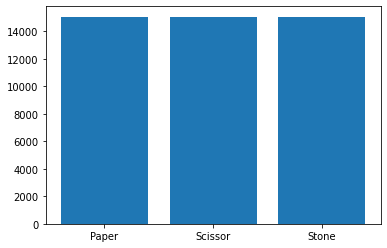

In [82]:
plt.bar(x =data['Category'].value_counts().index, height =  data['Category'].value_counts())

## Visualizing the Dataset

In [83]:
def view_landmarks(landmarks):
    images = []
    for idx in range(len(landmarks)):
        img = np.zeros((256, 256, 3), dtype=np.uint8)
        landmark = landmarks.iloc[idx]
        lms = [(int(landmark[2*i]*256), int(landmark[2*i+1]*256)) for i in range(21)]
        for idx, lm in enumerate(lms):

            # Plot wrist as green
            if(idx == 0):
                img = cv2.circle(img, lm, radius = 1, color = (0, 255, 0), thickness = 2)
            elif(idx % 4 == 0):
                img = cv2.circle(img, lm, radius = 1, color = (255, 0, 0), thickness = 2)
            else:
                img = cv2.circle(img, lm, radius = 1, color = (255, 255, 255), thickness = 2)


        images.append((img, landmark[42]))
    return images

def plot_landmarks(landmarks, name:str = None):
    # Plot 16 landmarks at random
    fig, axes = plt.subplots(3, 3, figsize = (20, 20))
    axarr = axes.flat
    images = view_landmarks(landmarks)

    for i, axis in enumerate(axarr):
        axis.imshow(images[i][0])
        if(type(images[i][1]) == str):
            axis.set_title(images[i][1], fontdict = {'family': 'Serif', 'fontsize': 30})
        else:
            axis.set_title(labels[int(images[i][1])], fontdict = {'fontsize': 30})
        axis.axis('off')
        axis.set_title
    
    plt.subplots_adjust(
    left=0.1,
    bottom = 0.1,
    right=0.9,
    top = 0.9,
    wspace=0.1,
    hspace = 0.3    
    )
    if name:
        fig.savefig(name)
    


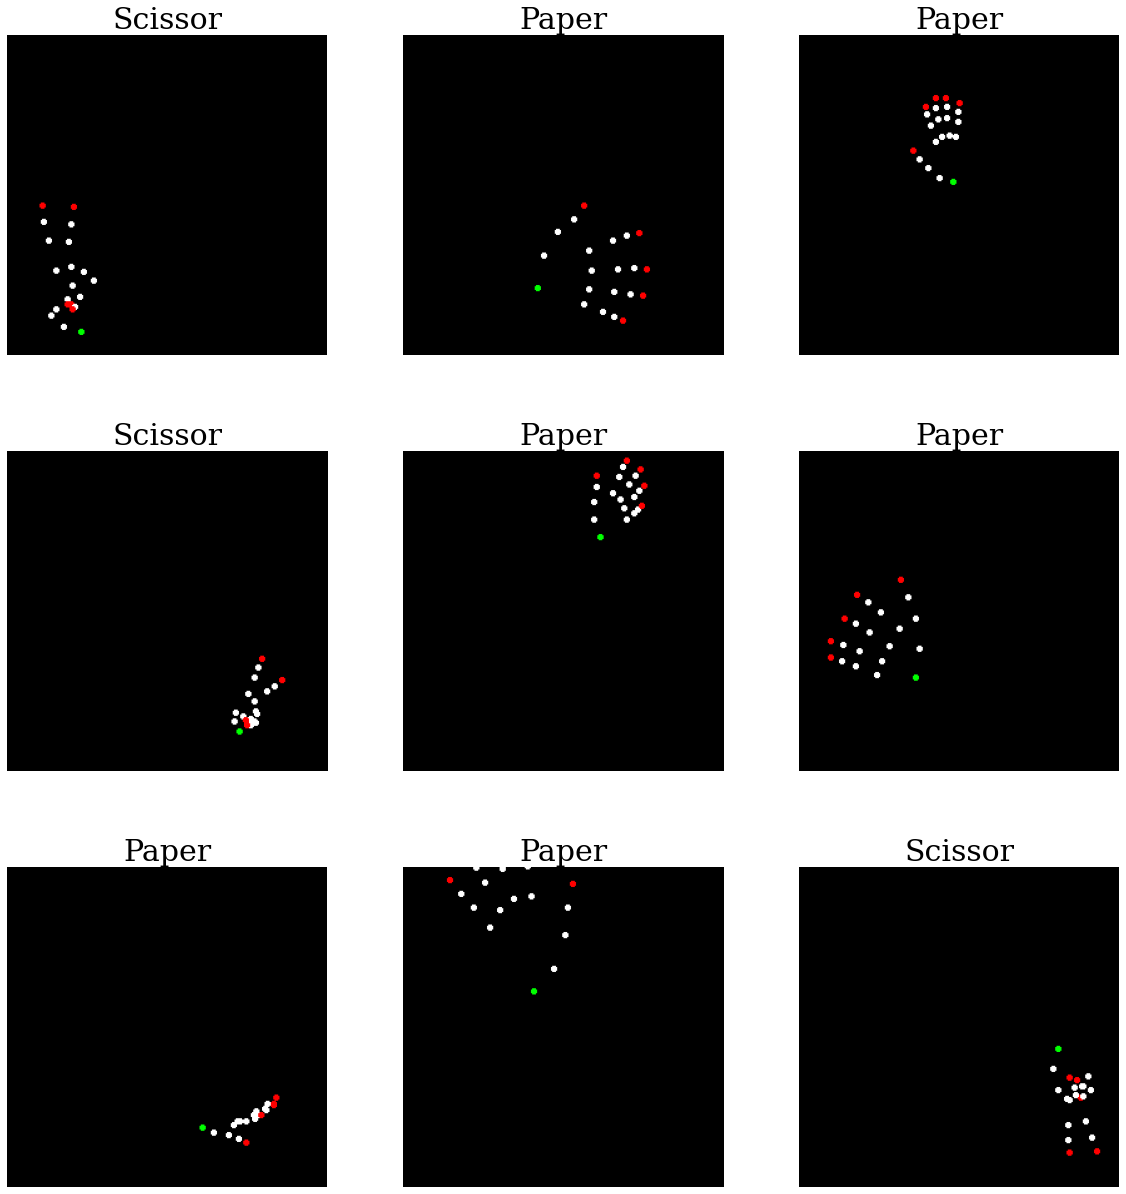

In [84]:
plot_landmarks(original_df.sample(n = 9), name = "Landmarks_plot.jpeg")
# Green point denotes the wrist, and Red ones denotes the tips of fingers.

In [85]:
encoder = {
    "Stone": 0,
    "Paper": 1,
    "Scissor": 2
}
labels = ["Stone", "Paper", "Scissor"]

# Convert the labels into encoded format
# data['Category'] = [encoder[i] for i in data['Category']]

### Analysis from above plots
    -> We can observe that the plots resemble the pattern similar to their mentioned class.
    -> The plots seem to be localized in a very small area of the images.
    -> Their position on plot has no value our classification.
    -> Rather, we care about the pattern they form together.

## Feature Transformation
    -> All the landmarks of a given example are centerd with respect to the position of wrist.

In [86]:
# Let's first check by relocating the landmarks to center
data.iloc[:, [2*i for i in range(21)]] = data.iloc[:, [2*i for i in range(21)]] - data.iloc[:, [0 for i in range(21)]].values + 0.5
data.iloc[:, [(2*i)+1 for i in range(21)]] = data.iloc[:, [(2*i)+1 for i in range(21)]] - data.iloc[:, [1 for i in range(21)]].values + 0.5

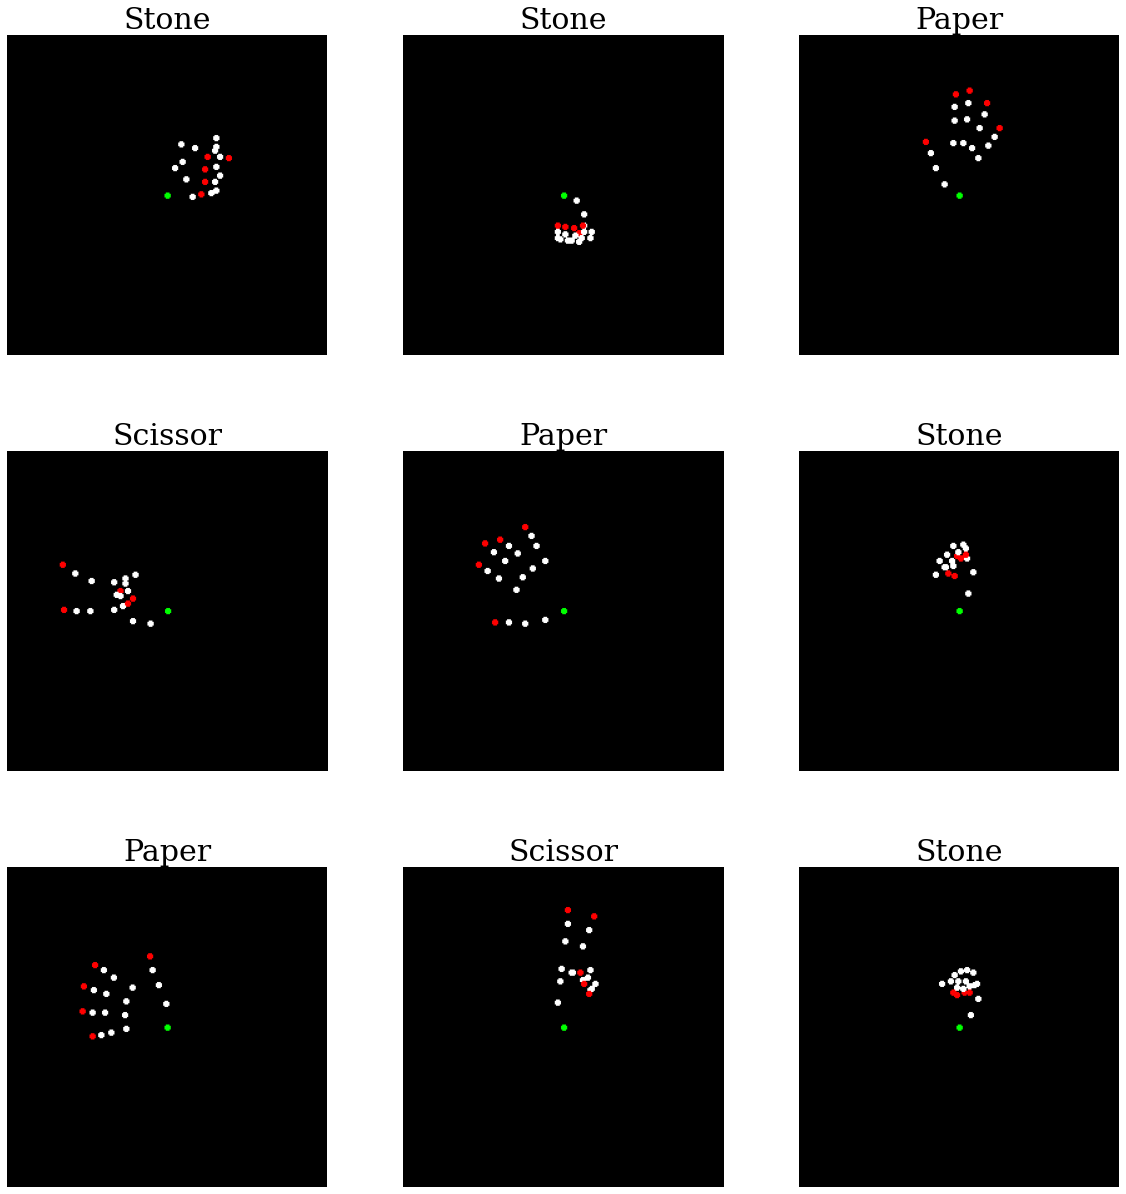

In [87]:
plot_landmarks(data.sample(n = 16), 'centered_lms')

## Observations-
    -> The wrist landmark always lies at center of the plot.
    -> We shall relocate all the landmarks to 0, 0 for better model training.

In [88]:
# Let's first check by relocating the landmarks to center
data.iloc[:, [2*i for i in range(21)]] = data.iloc[:, [2*i for i in range(21)]] - data.iloc[:, [0 for i in range(21)]].values - 0.5
data.iloc[:, [(2*i)+1 for i in range(21)]] = data.iloc[:, [(2*i)+1 for i in range(21)]] - data.iloc[:, [1 for i in range(21)]].values - 0.5

# The wrist is always at 0, 0
# So, we drop that column
data.drop(columns = ['0_x', '0_y'], inplace = True)

In [89]:
data.head()

,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,5_x,5_y,...,16_y,17_x,17_y,18_x,18_y,19_x,19_y,20_x,20_y,Category
0,-0.530437,-0.579509,-0.543342,-0.674114,-0.546055,-0.758523,-0.564817,-0.818612,-0.514166,-0.683927,...,-0.795765,-0.410408,-0.588654,-0.361355,-0.655476,-0.329213,-0.690923,-0.302661,-0.724691,Paper
1,-0.534020,-0.551119,-0.544823,-0.596018,-0.561594,-0.623005,-0.573181,-0.638157,-0.490446,-0.665082,...,-0.600754,-0.499224,-0.604395,-0.553567,-0.610256,-0.558662,-0.588666,-0.549073,-0.577062,Scissor
2,-0.450045,-0.508450,-0.410474,-0.554573,-0.409796,-0.614574,-0.435294,-0.651831,-0.436625,-0.611993,...,-0.566737,-0.511956,-0.636583,-0.472923,-0.638860,-0.472335,-0.599750,-0.485784,-0.585789,Stone
3,-0.459999,-0.553098,-0.441008,-0.598948,-0.428097,-0.619836,-0.420758,-0.618973,-0.490942,-0.675427,...,-0.594119,-0.511472,-0.589275,-0.456300,-0.596426,-0.435767,-0.595022,-0.429089,-0.598358,Scissor
4,-0.493721,-0.578590,-0.500516,-0.663143,-0.516787,-0.729158,-0.518933,-0.783199,-0.539673,-0.660805,...,-0.668114,-0.598818,-0.535457,-0.650296,-0.554011,-0.683671,-0.563610,-0.712735,-0.574116,Paper


## Data Preparation For Model

In [90]:
data.head()

,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,5_x,5_y,...,16_y,17_x,17_y,18_x,18_y,19_x,19_y,20_x,20_y,Category
0,-0.530437,-0.579509,-0.543342,-0.674114,-0.546055,-0.758523,-0.564817,-0.818612,-0.514166,-0.683927,...,-0.795765,-0.410408,-0.588654,-0.361355,-0.655476,-0.329213,-0.690923,-0.302661,-0.724691,Paper
1,-0.534020,-0.551119,-0.544823,-0.596018,-0.561594,-0.623005,-0.573181,-0.638157,-0.490446,-0.665082,...,-0.600754,-0.499224,-0.604395,-0.553567,-0.610256,-0.558662,-0.588666,-0.549073,-0.577062,Scissor
2,-0.450045,-0.508450,-0.410474,-0.554573,-0.409796,-0.614574,-0.435294,-0.651831,-0.436625,-0.611993,...,-0.566737,-0.511956,-0.636583,-0.472923,-0.638860,-0.472335,-0.599750,-0.485784,-0.585789,Stone
3,-0.459999,-0.553098,-0.441008,-0.598948,-0.428097,-0.619836,-0.420758,-0.618973,-0.490942,-0.675427,...,-0.594119,-0.511472,-0.589275,-0.456300,-0.596426,-0.435767,-0.595022,-0.429089,-0.598358,Scissor
4,-0.493721,-0.578590,-0.500516,-0.663143,-0.516787,-0.729158,-0.518933,-0.783199,-0.539673,-0.660805,...,-0.668114,-0.598818,-0.535457,-0.650296,-0.554011,-0.683671,-0.563610,-0.712735,-0.574116,Paper


In [91]:
X_data = data.iloc[:,:-1]
Y_data = data.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size = 0.8)

In [92]:
encoder = sklearn.preprocessing.LabelEncoder()
encoder.fit(['Stone', 'Paper', 'Scissor'])
Y_train_encoded = encoder.transform(Y_train)
Y_test_encoded = encoder.transform(Y_test)

# PCA

In [93]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA(7)
pc = pca.fit_transform(X_train)

df = pd.DataFrame(pc, columns = [f'Pc_{i}' for i in range(1, 8)])
cols = [f'Pc_{i}' for i in range(1, 8)]
cols.append('Category')

df = pd.concat([df, pd.Series(np.array(Y_train))], axis = 1, ignore_index = True)
df.columns = cols
pc_x_train = pc
pc_x_test = pca.transform(X_test)

In [95]:
df.head()

,Pc_1,Pc_2,Pc_3,Pc_4,Pc_5,Pc_6,Pc_7,Category
0,-0.424303,0.250803,-0.067976,0.109229,0.107291,-0.118577,0.021096,Scissor
1,-0.347238,-0.036268,0.098784,-0.046147,0.061542,-0.040818,-0.077358,Scissor
2,-0.341171,0.533535,0.083311,-0.095201,-0.122818,0.147622,-0.014136,Scissor
3,0.274664,0.689946,0.122336,0.016166,0.054529,-0.019866,-0.028683,Paper
4,-0.168728,-0.258403,0.018303,-0.216404,-0.164703,-0.116015,0.064764,Stone


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36040 entries, 0 to 36039
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pc_1      36040 non-null  float64
 1   Pc_2      36040 non-null  float64
 2   Pc_3      36040 non-null  float64
 3   Pc_4      36040 non-null  float64
 4   Pc_5      36040 non-null  float64
 5   Pc_6      36040 non-null  float64
 6   Pc_7      36040 non-null  float64
 7   Category  36040 non-null  object 
dtypes: float64(7), object(1)
memory usage: 2.2+ MB


In [97]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'#D8D8D8'})

palette = {
    'Stone': 'red',
    'Paper': 'green',
    'Scissor': 'blue'
}

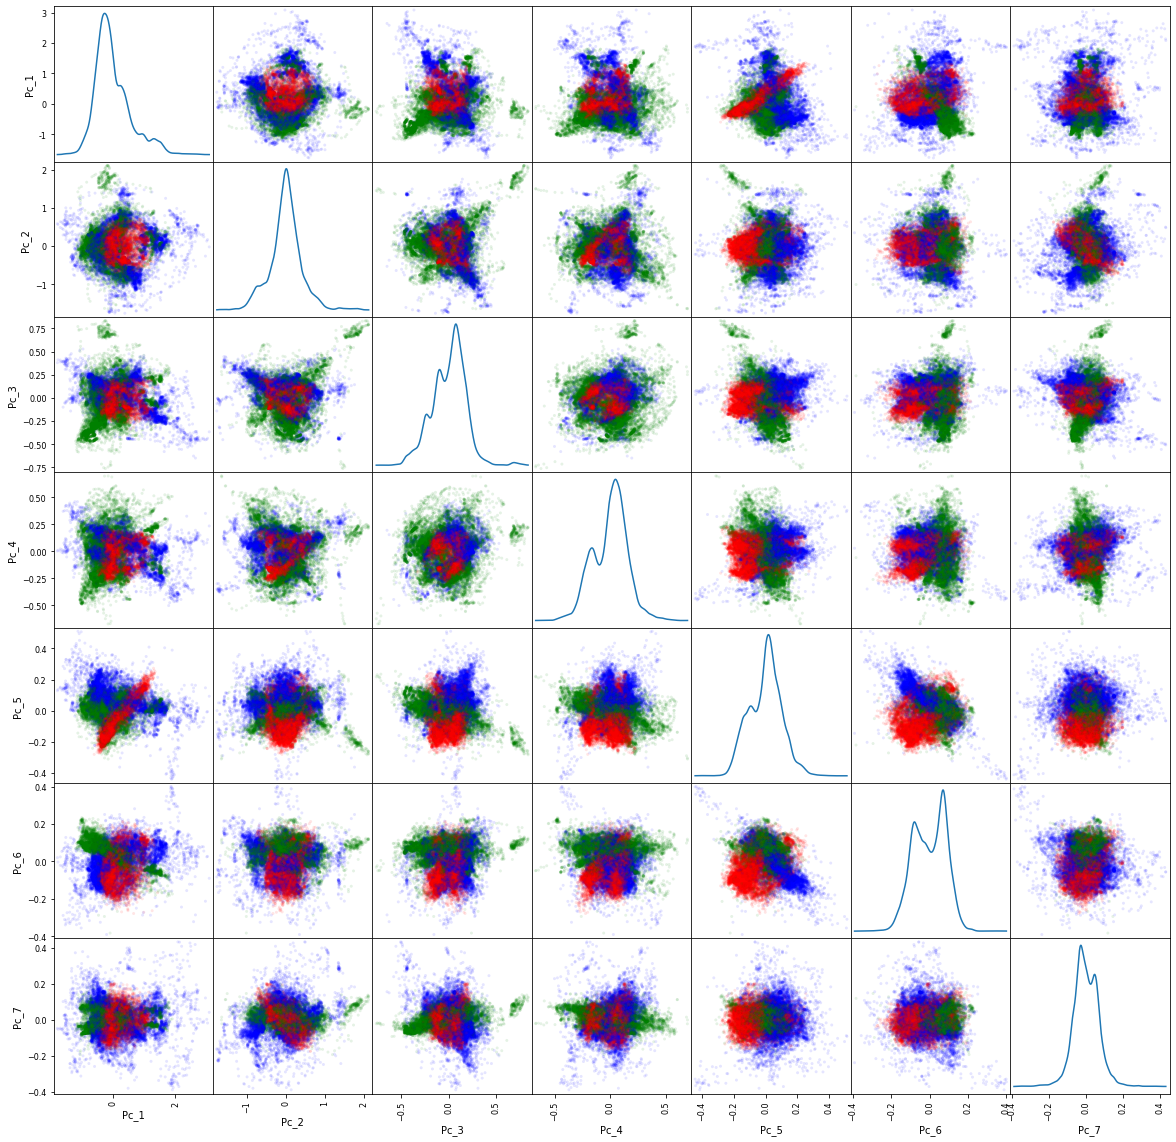

In [98]:
pd.plotting.scatter_matrix(
    df.iloc[:, :-1],
    figsize = (20, 20),
    diagonal = 'kde',
    alpha = 0.1,
    c = df.Category.map(palette)
)
plt.savefig('PCA.jpeg')

### Observations from Decomposition of data into 7 Principle Components
    -> From pairwise scatterplot, we can observe that the distribution of samples is visibly distinct.
    -> A bit of localization can be viewed for different classes.
    -> So, we can assume that simple machine learning algorithms shall give good results.

# Training And Evaluation Of Models

In [106]:
def train_and_evaluate(model, x_train, x_test, y_train, y_test, name):
    st_time = datetime.now()

    model.fit(x_train, y_train)
    fit_time = datetime.now()

    train_pred = model.predict(x_train)
    pred_time = datetime.now()
    test_pred = model.predict(x_test)
    

    train_time = (fit_time - st_time).total_seconds()
    pred_time = (pred_time - fit_time).total_seconds()
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred, average='micro')
    recall = recall_score(y_test, test_pred, average = 'micro')
    f1score = f1_score(y_test, test_pred, average = 'micro')
    return {
        'Name': name,
        'Train_time': train_time,
        'Prediction_time': pred_time,
        'Train_acc': train_acc,
        'Test_acc': test_acc,
        'Precision_score': precision,
        'Recall_score': recall,
        'F1_Score': f1score
    }

In [107]:
evaluation_df = pd.DataFrame(columns = ['Name', 'Train_time', 'Prediction_time', 'Train_acc', 'Test_acc', 'Precision_score', 'Recall_score'])

## K Nearest Neighbors Classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 4)
pc_neigh = KNeighborsClassifier(n_neighbors = 4)

knn_model_metrics = train_and_evaluate(neigh, X_train, X_test, Y_train, Y_test, 'KNN')
pca_knn_model_metrics = train_and_evaluate(pc_neigh, pc_x_train, pc_x_test, Y_train, Y_test, 'KNN_PCA')

In [109]:
evaluation_df = evaluation_df.append(knn_model_metrics, ignore_index = True)
evaluation_df = evaluation_df.append(pca_knn_model_metrics, ignore_index = True)

In [110]:
evaluation_df

,Name,Train_time,Prediction_time,Train_acc,Test_acc,Precision_score,Recall_score,F1_Score
0,KNN,0.054529,21.896602,0.991426,0.984795,0.984795,0.984795,0.984795
1,KNN_PCA,0.177955,2.478382,0.984184,0.971920,0.971920,0.971920,0.971920


### K-Nearest Neighbors results-
    -> KNN classifier gives very good results, with very high accuracy.
    -> But, it uses "Instance Based Learning Technique" to predict results.
    -> This makes it slow at prediction.
    -> We need a classifier with good accuracy and fast prediction.
### Principle Components-
    -> We see that the accuracy is same in both cases
    -> Using original features of the data and using 7 Principle Components.
    -> But predictions in case of Principle Components was way faster,  bringing the time for predictions to around half.

## Support Vector Machines

In [111]:
from sklearn.svm import SVC

In [112]:
svc = SVC(C = 0.1)
svc_pc = SVC(C = 0.1)

svc_metrics = train_and_evaluate(svc, X_train, X_test, Y_train, Y_test, 'SVC')
pca_svc_metrics = train_and_evaluate(svc_pc, pc_x_train, pc_x_test, Y_train, Y_test, 'SVC_PCA')

evaluation_df = evaluation_df.append(svc_metrics, ignore_index = True)
evaluation_df = evaluation_df.append(pca_svc_metrics, ignore_index = True)

evaluation_df.head()

,Name,Train_time,Prediction_time,Train_acc,Test_acc,Precision_score,Recall_score,F1_Score
0,KNN,0.054529,21.896602,0.991426,0.984795,0.984795,0.984795,0.984795
1,KNN_PCA,0.177955,2.478382,0.984184,0.971920,0.971920,0.971920,0.971920
2,SVC,46.560783,22.081680,0.966842,0.966593,0.966593,0.966593,0.966593
3,SVC_PCA,18.623345,18.597102,0.943479,0.943174,0.943174,0.943174,0.943174


## Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

In [114]:
# # This cell was run to get best paramters for random forest classifier
# rfc = RandomForestClassifier()
# params = {
#     'n_estimators' : [100, 200],
#     'max_depth' : [8, 16, 32],
#     'min_samples_split' : [2, 4, 8],
#     'min_samples_leaf' : [1, 2, 4]
# }

# rfc_gs = GridSearchCV(rfc, params)
# rfc_gs.fit(X_train, Y_train)

#best parameters for random forest classifier
# best_params = {'max_depth': 32,
#     'min_samples_leaf': 1,
#     'min_samples_split': 2,
#     'n_estimators': 200}

In [115]:
rfc = RandomForestClassifier(
    n_estimators = 250, max_depth = 64
)
rfc_pc = RandomForestClassifier(
    n_estimators = 250, max_depth = 64
)

rfc_metrics = train_and_evaluate(rfc, X_train, X_test, Y_train, Y_test, 'RFC')
pca_rfc_metrics = train_and_evaluate(rfc_pc, pc_x_train, pc_x_test, Y_train, Y_test, 'RFC_PCA')

evaluation_df = evaluation_df.append(rfc_metrics, ignore_index = True)
evaluation_df = evaluation_df.append(pca_rfc_metrics, ignore_index = True)

evaluation_df

,Name,Train_time,Prediction_time,Train_acc,Test_acc,Precision_score,Recall_score,F1_Score
0,KNN,0.054529,21.896602,0.991426,0.984795,0.984795,0.984795,0.984795
1,KNN_PCA,0.177955,2.478382,0.984184,0.971920,0.971920,0.971920,0.971920
2,SVC,46.560783,22.081680,0.966842,0.966593,0.966593,0.966593,0.966593
3,SVC_PCA,18.623345,18.597102,0.943479,0.943174,0.943174,0.943174,0.943174
4,RFC,71.060283,1.478979,1.000000,0.983241,0.983241,0.983241,0.983241
5,RFC_PCA,22.276928,1.221620,1.000000,0.976138,0.976138,0.976138,0.976138


## Extreme Gradient Boost

In [116]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators = 500, learning_rate = 0.1)
xgbc_pc = XGBClassifier(n_estimators = 500, learning_rate = 0.1)
# xgbc.fit(X_train, Y_train)

xgbc_metrics = train_and_evaluate(xgbc, X_train, X_test, Y_train, Y_test, 'XGBC')
pca_xgbc_metrics = train_and_evaluate(xgbc_pc, pc_x_train, pc_x_test, Y_train, Y_test, 'XGBC_PCA')

evaluation_df = evaluation_df.append(xgbc_metrics, ignore_index = True)
evaluation_df = evaluation_df.append(pca_xgbc_metrics, ignore_index = True)
evaluation_df.head()

,Name,Train_time,Prediction_time,Train_acc,Test_acc,Precision_score,Recall_score,F1_Score
0,KNN,0.054529,21.896602,0.991426,0.984795,0.984795,0.984795,0.984795
1,KNN_PCA,0.177955,2.478382,0.984184,0.971920,0.971920,0.971920,0.971920
2,SVC,46.560783,22.081680,0.966842,0.966593,0.966593,0.966593,0.966593
3,SVC_PCA,18.623345,18.597102,0.943479,0.943174,0.943174,0.943174,0.943174
4,RFC,71.060283,1.478979,1.000000,0.983241,0.983241,0.983241,0.983241


## Evaluation Using metrics of different models

In [117]:
evaluation_df

,Name,Train_time,Prediction_time,Train_acc,Test_acc,Precision_score,Recall_score,F1_Score
0,KNN,0.054529,21.896602,0.991426,0.984795,0.984795,0.984795,0.984795
1,KNN_PCA,0.177955,2.478382,0.984184,0.971920,0.971920,0.971920,0.971920
2,SVC,46.560783,22.081680,0.966842,0.966593,0.966593,0.966593,0.966593
3,SVC_PCA,18.623345,18.597102,0.943479,0.943174,0.943174,0.943174,0.943174
4,RFC,71.060283,1.478979,1.000000,0.983241,0.983241,0.983241,0.983241
5,RFC_PCA,22.276928,1.221620,1.000000,0.976138,0.976138,0.976138,0.976138
6,XGBC,111.517559,1.569886,0.995560,0.984795,0.984795,0.984795,0.984795
7,XGBC_PCA,26.231919,1.877372,0.978246,0.966149,0.966149,0.966149,0.966149


In [118]:
evaluation_df.set_index('Name', inplace = True)

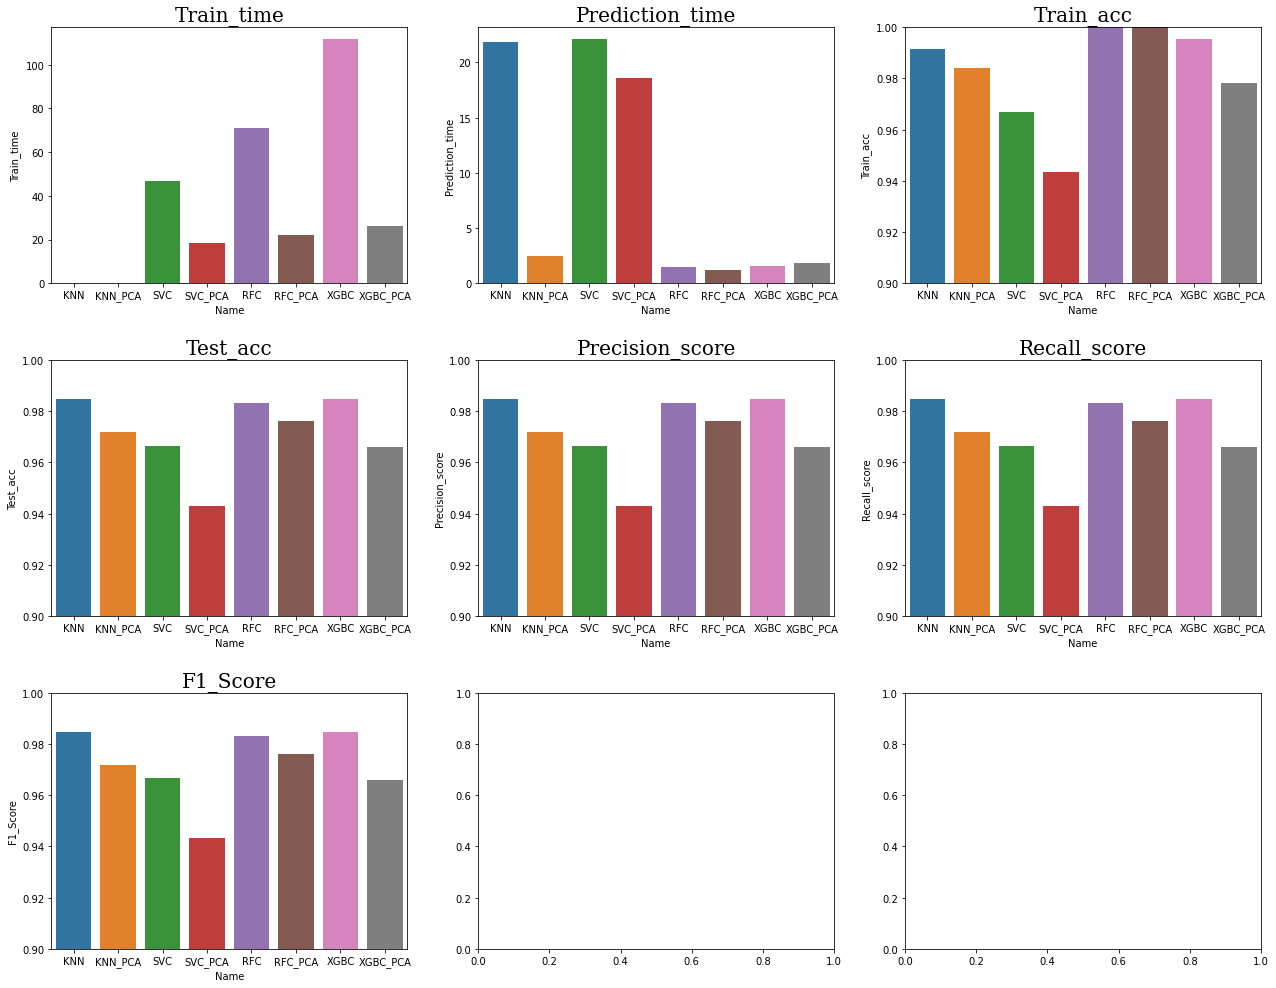

In [119]:
col_names = evaluation_df.columns
fig, axes = plt.subplots(3, 3)
fig.set_figheight(16)
fig.set_figwidth(21)
axarr = axes.flat
for idx, ax in enumerate(axarr[:-2]):
    axis = sns.barplot(
        x = evaluation_df.index,
        y = evaluation_df[col_names[idx]],
        ax = ax
    )
    axis.set_title(col_names[idx], fontdict = {'family': 'Serif', 'fontsize': 20})
    if(idx > 1):
        axis.set_ylim(bottom = 0.9, top = 1.0)
plt.subplots_adjust(
left=0.1,
bottom = 0.1,
right=0.9,
top = 0.9,
wspace=0.2,
hspace = 0.3    
)
plt.savefig('Evaluation bar plots.jpeg')

## Observations from Evaluation
    -> XGBoost Classifier takes least time for predictions, close to NIL when compared to other classifiers.
    -> Test Accuracy, Precision and Recall are maximum for Random Forest and XGBoost.
    -> We shall consider prediction time, accuracy_score and F1_Score to decide best model for the classification.
    -> Thus, as visible from the above Bar Plots, XGBoost is the preferable model.
    -> We shall now tune the hyperparameters for the model, to get best results.

## Hyperparameter Tuning for XGBoost

In [120]:
xgbc = XGBClassifier(
    n_estimators = 750,
    learning_rate = 0.25,
    max_depth = 16
)

In [121]:
metrics1 = train_and_evaluate(xgbc, X_train, X_test, Y_train, Y_test, name = 'XGBC')
metrics1

{'F1_Score': 0.9879023307436182,
 'Name': 'XGBC',
 'Precision_score': 0.9879023307436182,
 'Prediction_time': 5.043723,
 'Recall_score': 0.9879023307436182,
 'Test_acc': 0.9879023307436182,
 'Train_acc': 1.0,
 'Train_time': 267.537518}

In [122]:
# pca = PCA(12)
# pc = pca.fit_transform(X_train)

# cols = [f'Pc_{i}' for i in range(1, 13)]
# df = pd.DataFrame(pc, columns = cols)
# cols.append('Category')

# df = pd.concat([df, pd.Series(np.array(Y_train))], axis = 1, ignore_index = True)
# df.columns = cols
# pc_x_train = pc
# pc_x_test = pca.transform(X_test)

In [123]:
# from xgboost import XGBClassifier
# xgbc = XGBClassifier(
#     n_estimators = 750,
#     learning_rate = 0.35,
#     max_depth = 16
# )
# m3, me3 = train_and_evaluate(xgbc, pc_x_train, pc_x_test, Y_train, Y_test, name = 'XGBC')
# m3

In [124]:
xgbc

XGBClassifier(learning_rate=0.25, max_depth=16, n_estimators=750,
              objective='multi:softprob')

In [125]:
st = datetime.now()
a = xgbc.predict(X_train)
end = datetime.now()
(end - st).microseconds

92873

In [126]:
(end - st).total_seconds()

5.092873

In [127]:
from datetime import timedelta
delta = timedelta(
    days=50,
    seconds=27,
    microseconds=10,
    milliseconds=29000,
    minutes=5,
    hours=8,
    weeks=2
)
